In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bitcoin import core

core = core.Core()
df = core.load_data()
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,9322.00,9322.01,9322.01,9322.00,0.273876,0.104927,1063075.0,0.034975,0.170432
1,1520272380,9322.00,9322.01,9322.01,9322.00,0.145773,0.104928,1063083.0,0.034975,0.170432
2,1520272440,9320.00,9320.01,9320.00,9320.00,0.066710,0.104928,1063089.0,0.034975,0.170432
3,1520272500,9320.01,9320.01,9320.01,9320.01,0.013989,0.104928,1063091.0,0.034975,0.170432
4,1520272560,9320.01,9320.01,9320.01,9320.01,0.706339,0.104928,1063095.0,0.038833,0.170432


In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
1657,1520372160,NaN,NaN,NaN,NaN,0.654339,0.025497,865323.0,-0.010816,0.081297
1709,1520375280,NaN,8680.46,8680.46,8680.46,0.371350,0.024812,872689.0,0.006467,0.094706
2861,1520444460,NaN,NaN,7907.19,7911.75,0.357159,0.569371,195556.0,0.022494,0.145950
3358,1520474220,NaN,NaN,NaN,7979.99,0.010000,0.257240,43314.0,0.066666,0.031460
4706,1520555100,NaN,NaN,NaN,7618.31,0.763639,0.056127,164697.0,0.048031,0.040363
6397,1520656560,NaN,NaN,NaN,NaN,0.010000,0.027397,158975.0,0.143222,-0.045233
6843,1520683380,NaN,NaN,NaN,7662.03,0.470000,0.003894,526153.0,0.103413,0.037305
7218,1520705880,NaN,NaN,NaN,NaN,0.002690,-0.014957,144367.0,0.051631,-0.044623
8279,1520769600,NaN,NaN,NaN,7394.45,0.455545,0.125584,486583.0,0.032525,0.032101
8416,1520777820,NaN,NaN,NaN,7468.61,1.245290,-0.005625,370299.0,0.070506,0.048821


In [3]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,1.095500e+04,10944.000000,10945.000000,10946.000000,10951.000000,10955.000000,10955.000000,1.095500e+04,10955.000000,10955.000000
mean,1.520602e+09,7896.210964,7903.222926,7899.981828,7899.731191,1.877468,0.052815,4.513641e+05,0.069955,0.049444
std,1.904782e+05,650.522274,648.579321,649.447801,649.332171,4.127530,0.068069,2.835532e+05,0.037960,0.065482
min,1.520272e+09,6770.000000,6783.000000,6782.790000,6783.000000,0.000673,-0.084993,3.705000e+04,-0.028105,-0.100305
25%,1.520437e+09,7424.000000,7435.530000,7431.650000,7430.005000,0.150000,0.018826,2.295525e+05,0.048710,0.008901
50%,1.520601e+09,7719.995000,7725.000000,7721.040000,7721.000000,0.574685,0.042483,3.850000e+05,0.072863,0.048257
75%,1.520766e+09,8495.107500,8499.970000,8496.000000,8496.000000,1.893292,0.075142,5.816160e+05,0.093994,0.086736
max,1.520941e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.612404,1.365095e+06,0.173389,0.211511


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.757897,-0.759274,-0.758703,-0.758658,-0.017105,-0.199872,-0.637260,0.339032,-0.479087
low,-0.757897,1.000000,0.999814,0.999881,0.999916,-0.082617,0.059467,0.676433,-0.314056,0.661320
high,-0.759274,0.999814,1.000000,0.999916,0.999910,-0.068984,0.062432,0.677175,-0.314920,0.662374
open,-0.758703,0.999881,0.999916,1.000000,0.999841,-0.074009,0.060940,0.676820,-0.314758,0.661915
close,-0.758658,0.999916,0.999910,0.999841,1.000000,-0.076146,0.060634,0.676807,-0.314330,0.661719
volume,-0.017105,-0.082617,-0.068984,-0.074009,-0.076146,1.000000,0.158856,-0.040873,-0.014842,-0.018831
tw_sentiment,-0.199872,0.059467,0.062432,0.060940,0.060634,0.158856,1.000000,0.014115,-0.261894,0.167151
tw_followers,-0.637260,0.676433,0.677175,0.676820,0.676807,-0.040873,0.014115,1.000000,-0.302121,0.480259
reddit_sentiment,0.339032,-0.314056,-0.314920,-0.314758,-0.314330,-0.014842,-0.261894,-0.302121,1.000000,-0.491859
google_sentiment,-0.479087,0.661320,0.662374,0.661915,0.661719,-0.018831,0.167151,0.480259,-0.491859,1.000000


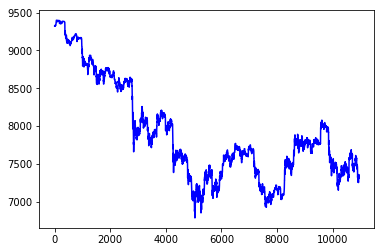

In [5]:
plt.plot(df['close'], 'b')

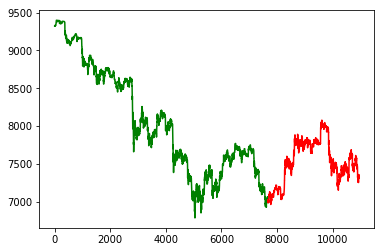

In [6]:
max = df['close'].count()
limit = int(0.3 * max)
plt.plot(df['close'][0:max - limit], 'g')
plt.plot(df['close'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f12b828>,
      dtype=object)

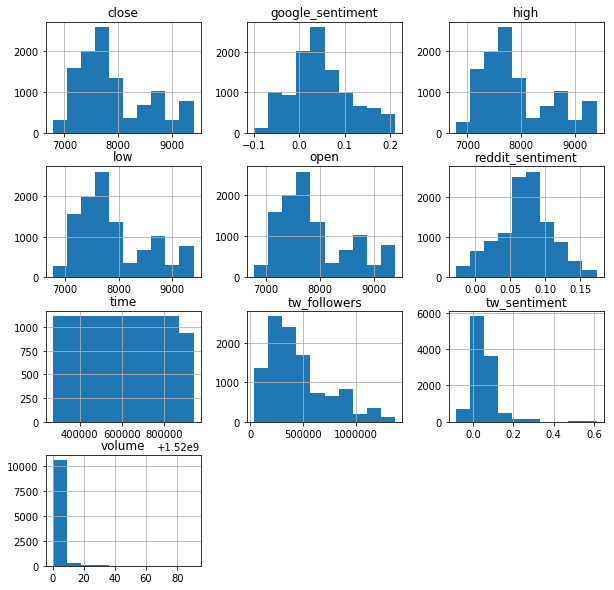

In [7]:
df.hist(figsize=(10,10))

In [8]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = core.prepare_inputs_outputs(df)

In [9]:
history = core.train()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

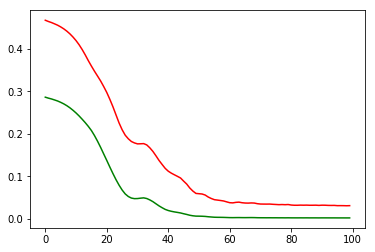

In [10]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [13]:
core.test_order_percent()

Error Order percentage: 14.04%
TEST From 2018-03-11 02:49:00 to 2018-03-13 12:36:00
Number of api calls: 0.20 / min
Number of anomalies: 166
With prediction 1447.13 euros => 44.71% => 22.36% / day
Without prediction 1041.21 euros => 4.12% => 2.06% / day
